In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

## Read and plot

In [2]:
df = pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [4]:
df.tail(15)

,Rose
YearMonth,
1994-05-01,44.0
1994-06-01,45.0
1994-07-01,NaN
1994-08-01,NaN
1994-09-01,46.0
1994-10-01,51.0
1994-11-01,63.0
1994-12-01,84.0
1995-01-01,30.0


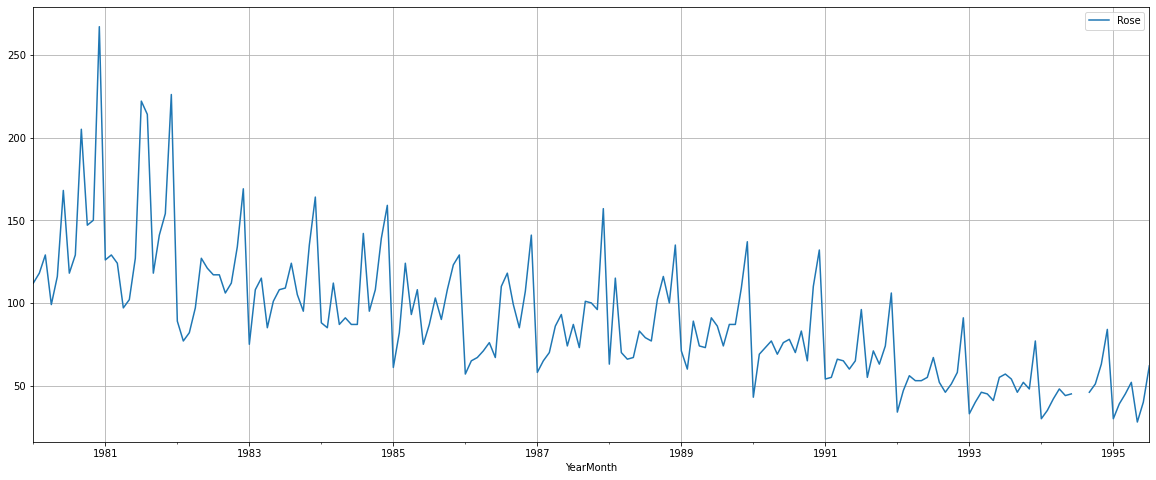

In [5]:
from pylab import rcParams
rcParams['figure.figsize']=20,8
df.plot()
plt.grid();

In [6]:
# Jul Sale - 62 considering 92, 93 & 95 data
# Aug Sale - 53 considering 91, 92 & 93 data

In [7]:
df.loc['1994-07-01']=62
df.loc['1994-08-01']=53

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 7.0 KB


In [9]:
from pylab import rcParams
rcParams['figure.figsize']=20,8

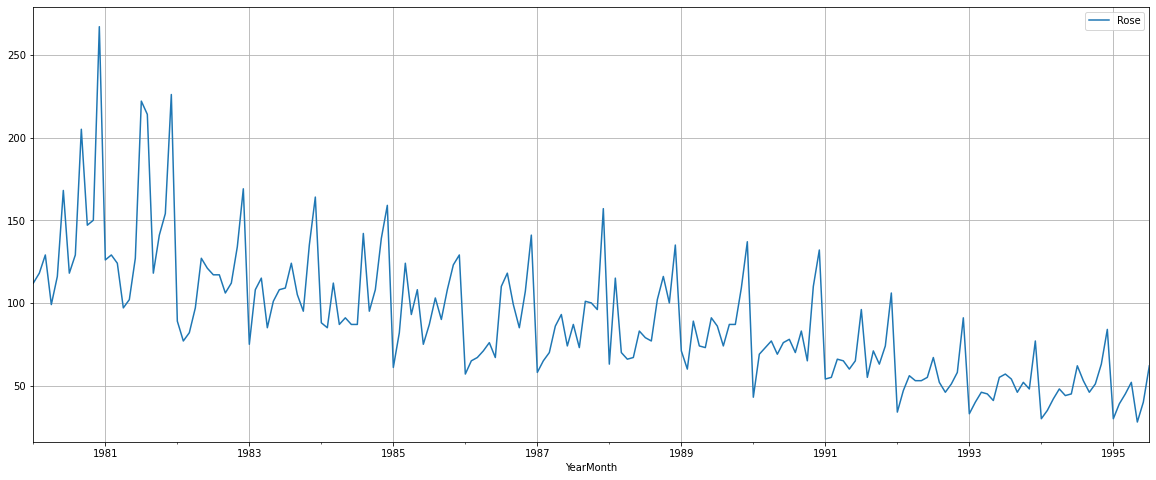

In [10]:
df.plot()
plt.grid();

We can see that the trend of Rose wine sale is steadily decreasng across the years.
Also, there is Seasonality in the data. The sales are increasing towards the mid & peaks the end of each year and fall in the Year Starting.

## EDA & Decomposition

### EDA

In [11]:
df.describe()

,Rose
count,187.000000
mean,90.042781
std,39.114366
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


#### Yearly Box Plot

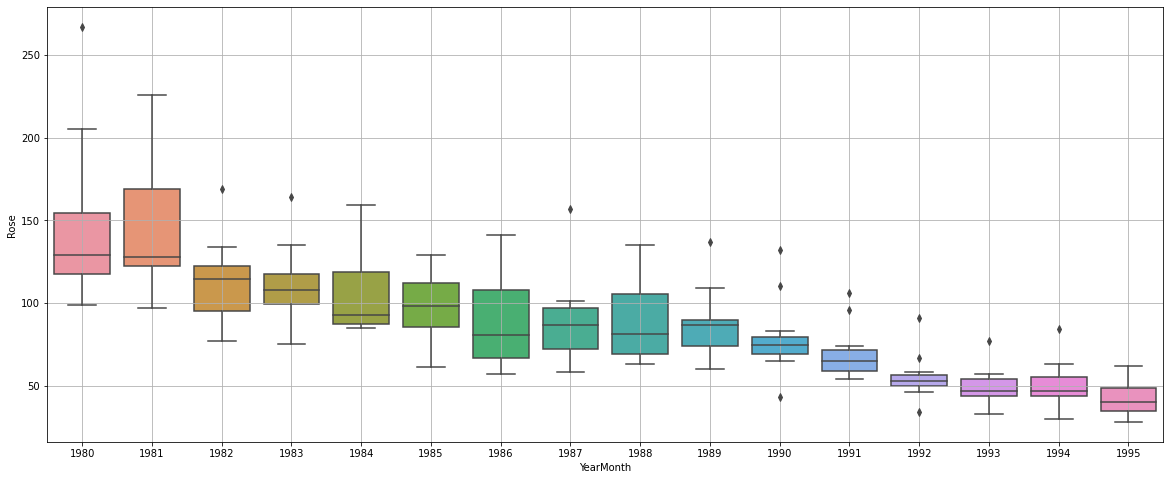

In [12]:
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.grid();

#### Monthly Box Plot

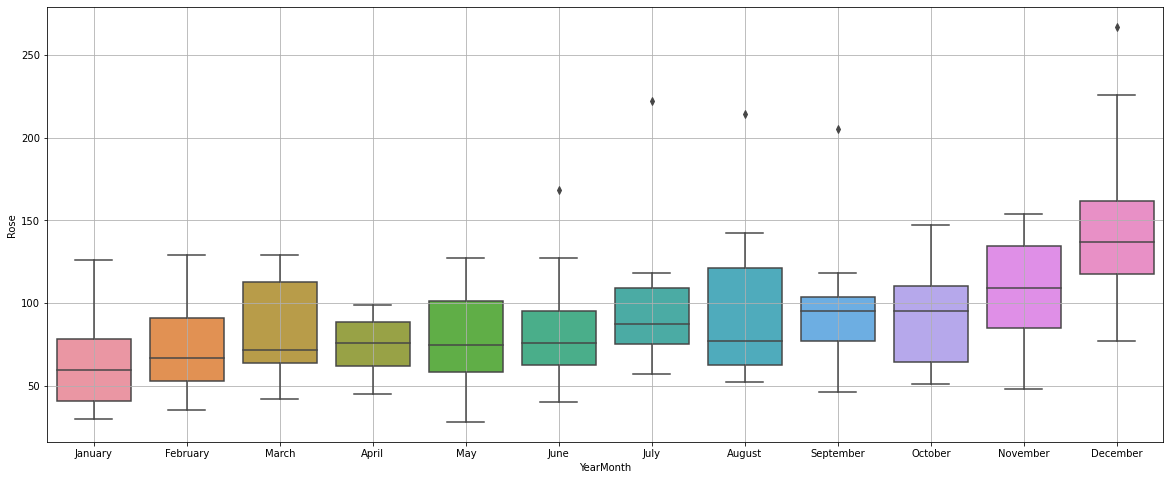

In [13]:
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

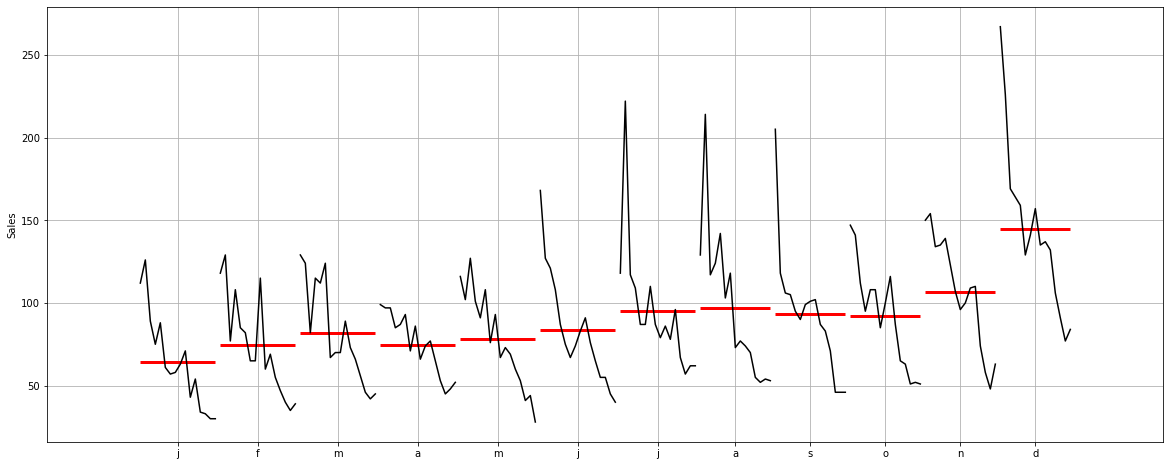

In [14]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Rose'],ylabel='Sales')
plt.grid();

In [15]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


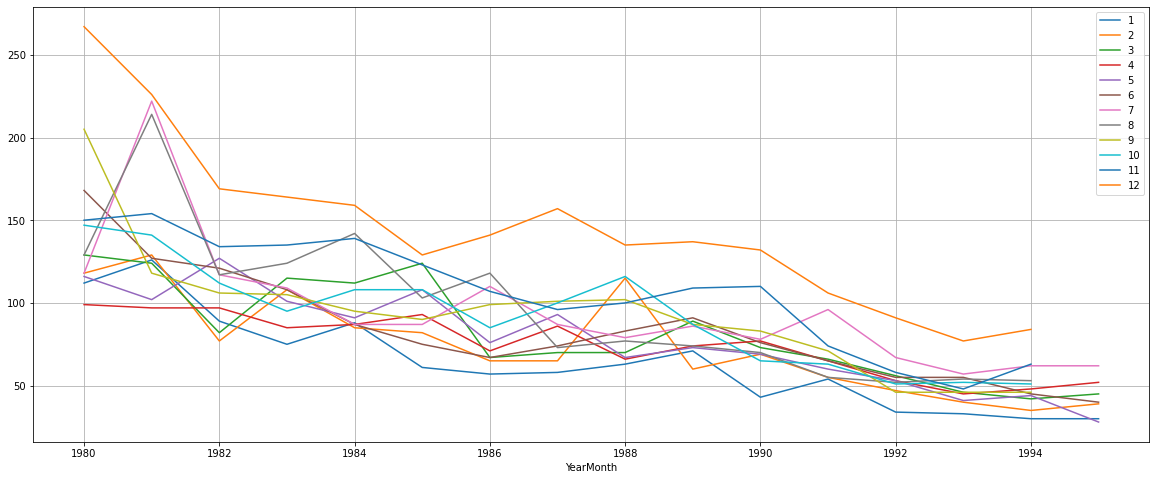

In [16]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

### Decomposition

In [17]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

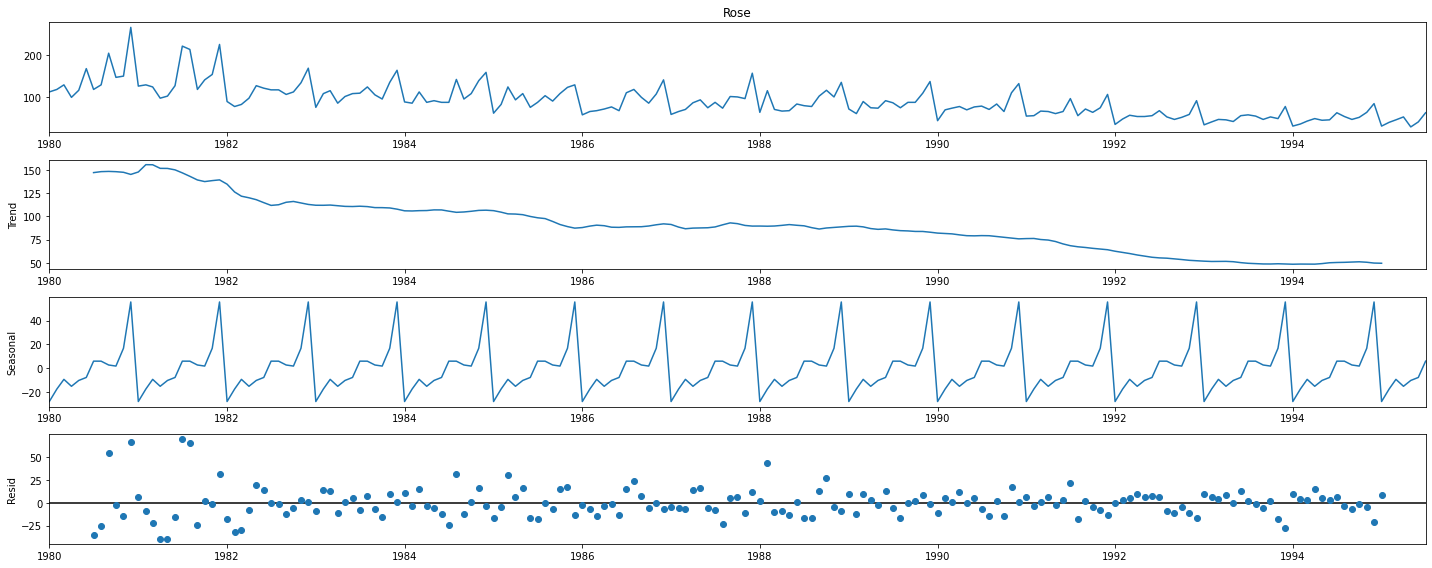

In [18]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

It can be seen from the above plots that there is clearly a decreasing trend. The seasonality component is also found in which is found to be increasing from mid to the end of the year and drop in the year start.

We can also see that the error is widespread, and there is some seasonal pattern of error in the middle years of the dataset. However, we can understand that there is still data that is yet to be captured. The error is centered across 0 with a wide range of values.

In [19]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -28.039831
1980-02-01   -17.554514
1980-03-01    -9.426538
1980-04-01   -15.239038
1980-05-01   -10.337252
1980-06-01    -7.819395
1980-07-01     5.876835
1980-08-01     5.857391
1980-09-01     2.643502
1980-10-01     1.740724
1980-11-01    16.715724
1980-12-01    55.582391
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -34.960169
1980-08-01   -24.982391
1980-09-01    53.981498
1980-10-01    -2.824058
1980-11-01   -14.132391
1980-12-01    66.29260

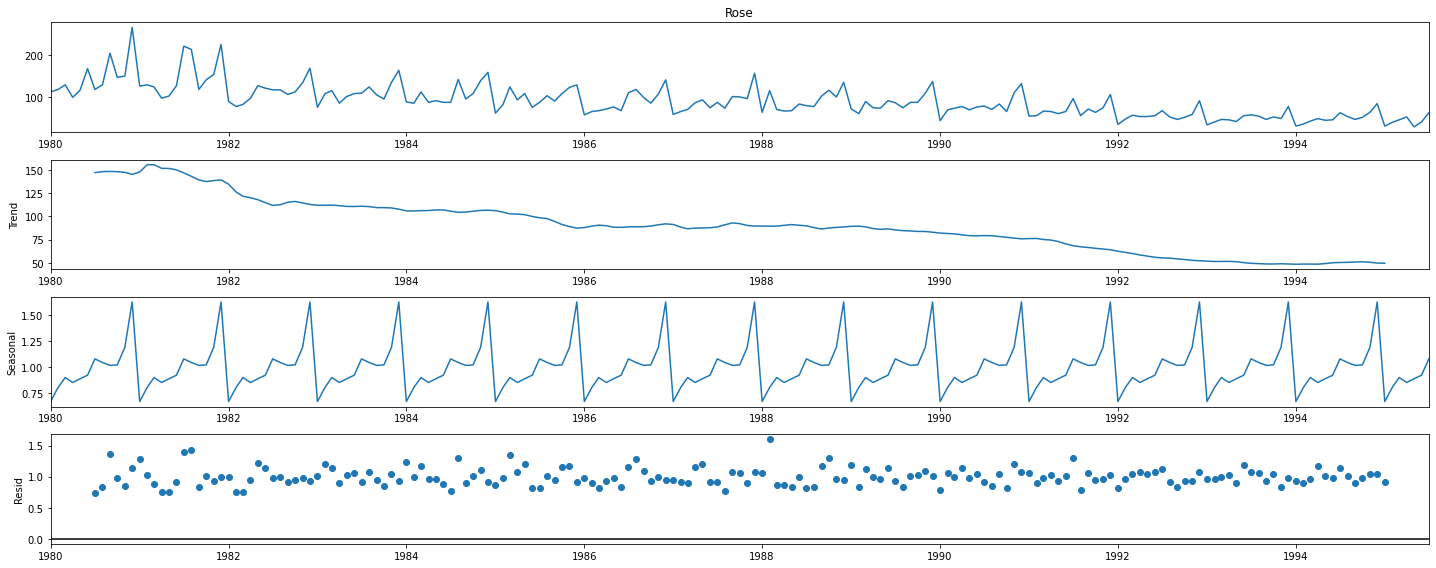

In [20]:
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

Here, we can see that the trend and seasonality are almost the same as in additive. Error is seen to be less spread and is centered across 1 with minimal range. Hence this is more or less a multiplicative model.

## Train Test Split

In [21]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [22]:
from IPython.display import display

In [23]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [24]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


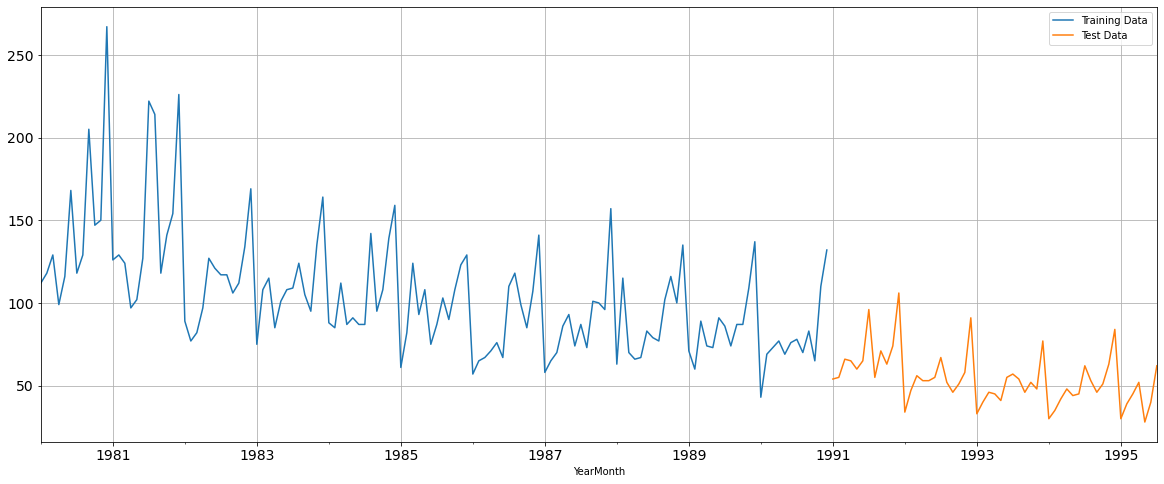

In [25]:
train['Rose'].plot(fontsize=14)
test['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

## Model Building

### Linear Regression

For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [26]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [27]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [28]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

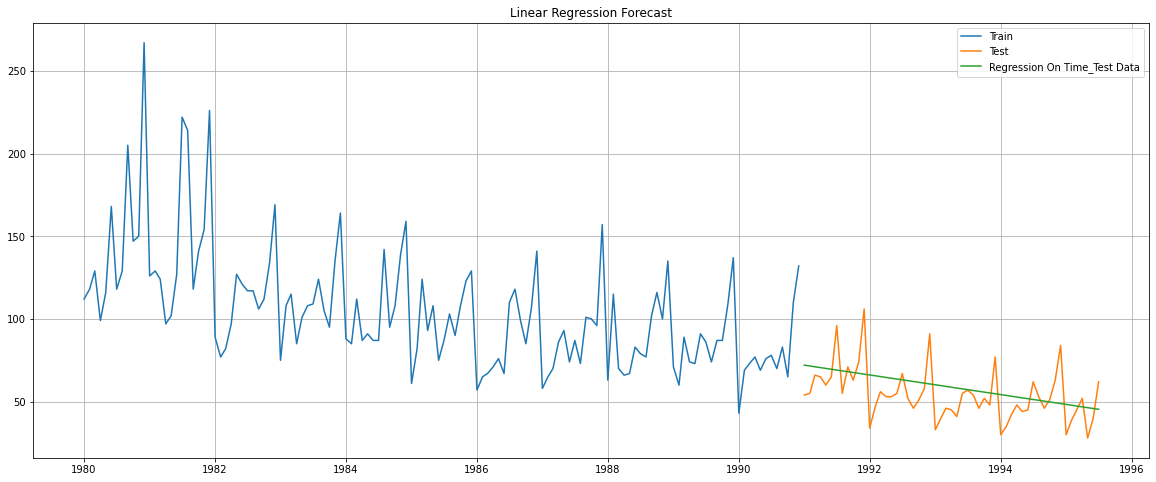

In [30]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title("Linear Regression Forecast")
plt.grid();

In [31]:
from sklearn import metrics

In [32]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.303


In [33]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.303047


### Naive Model

In [34]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [35]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

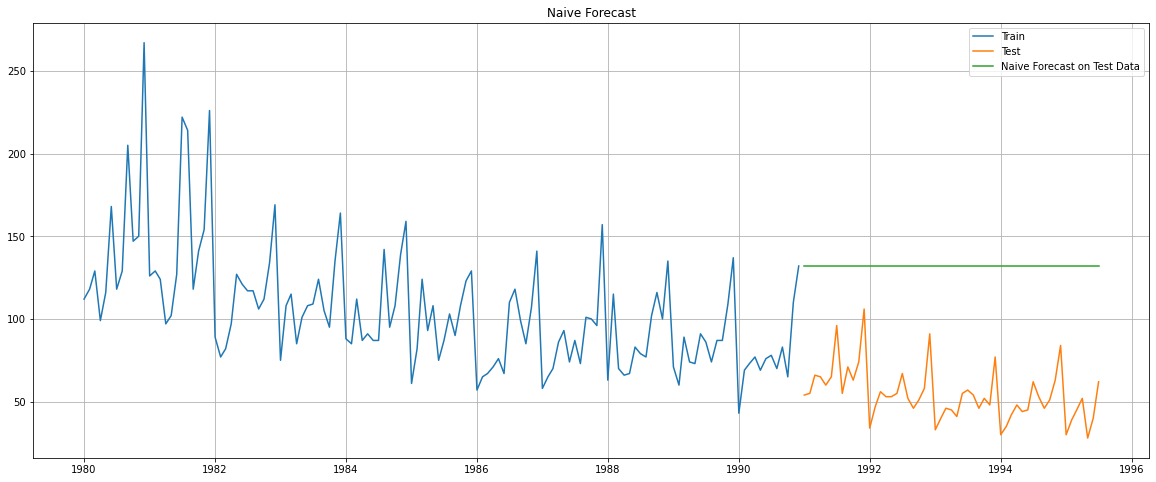

In [36]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [37]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 79.282


In [38]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,15.303047
NaiveModel,79.281547


### Simple Average Model

In [39]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [40]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


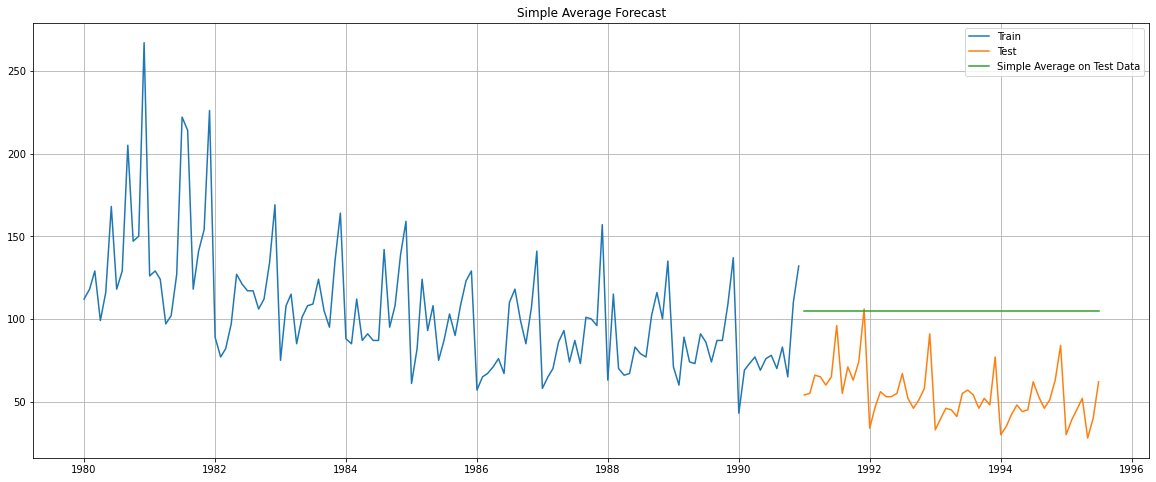

In [41]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [42]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.030


In [43]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.303047
NaiveModel,79.281547
SimpleAverageModel,53.029519


### Simple Exponential Smoothing Model

In [44]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [45]:
SES_train = train.copy()
SES_test = test.copy()

In [46]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

D:\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [47]:
model_SES_autofit = model_SES.fit(optimized=True)

In [48]:
model_SES_autofit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [49]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,87.104983
1991-02-01,55.0,87.104983
1991-03-01,66.0,87.104983
1991-04-01,65.0,87.104983
1991-05-01,60.0,87.104983


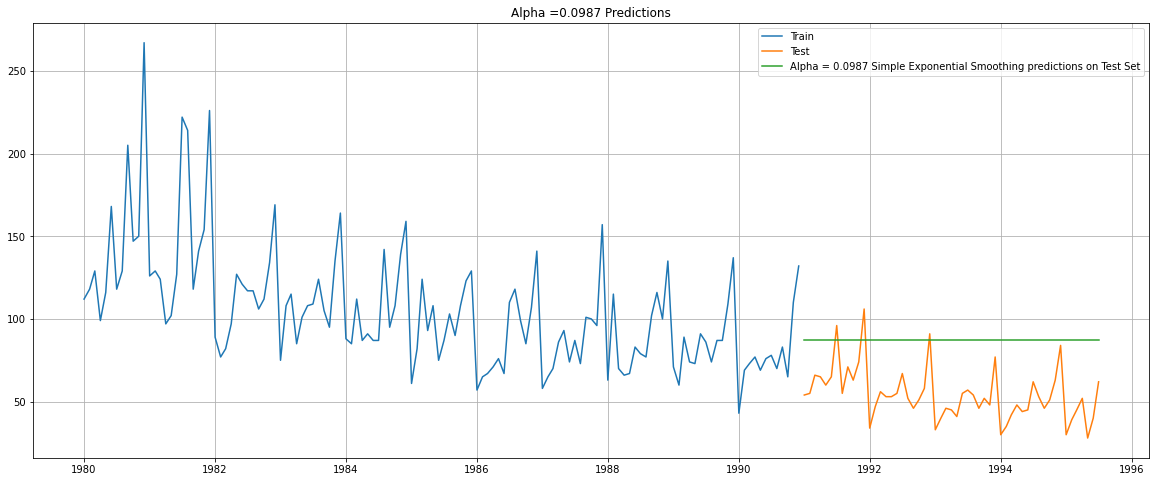

In [50]:
## Plotting on both the Training and Test data

plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha = 0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0987 Predictions');

In [51]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.382


In [52]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.0987,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,15.303047
NaiveModel,79.281547
SimpleAverageModel,53.029519
"Alpha=0.0987,SimpleExponentialSmoothing",36.381647


<b>Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

In [53]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [54]:
len(test)

55

In [55]:
np.arange(0.03,1,0.03)

array([0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3 , 0.33,
       0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.6 , 0.63, 0.66,
       0.69, 0.72, 0.75, 0.78, 0.81, 0.84, 0.87, 0.9 , 0.93, 0.96, 0.99])

In [56]:
for i in np.arange(0.03,1,0.03):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [57]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
1,0.06,32.209657,36.166299
2,0.09,31.862435,36.189902
3,0.12,31.778255,37.041678
4,0.15,31.809845,38.304245
0,0.03,33.353562,39.481594
5,0.18,31.900333,39.826623
6,0.21,32.022650,41.519178
7,0.24,32.162669,43.319883
8,0.27,32.313014,45.183696
9,0.30,32.470164,47.077358


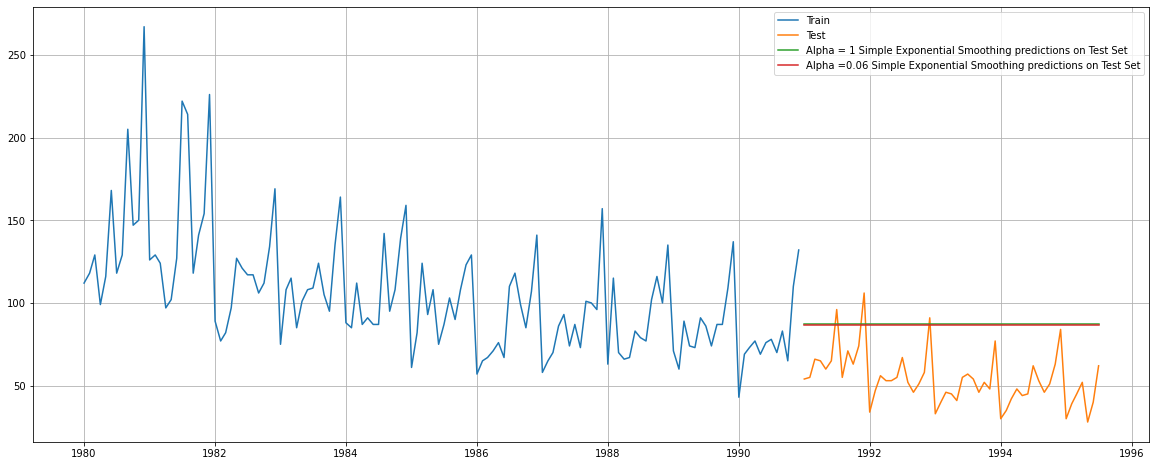

In [58]:
## Plotting on both the Training and Test data

plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha = 1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.06], label='Alpha =0.06 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [59]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.06,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,15.303047
NaiveModel,79.281547
SimpleAverageModel,53.029519
"Alpha=0.0987,SimpleExponentialSmoothing",36.381647
"Alpha=0.06,SimpleExponentialSmoothing",36.166299


### Double Exponential Smoothing

In [60]:
DES_train = train.copy()
DES_test = test.copy()

In [61]:
model_DES = Holt(DES_train['Rose'])

D:\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [62]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [63]:
for i in np.arange(0.03,1.1,0.03):
    for j in np.arange(0.03,1.1,0.03):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [64]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
7,0.03,0.24,44.094170,16.049350
1,0.03,0.06,66.475286,16.334595
21,0.03,0.66,39.208131,16.567926
5,0.03,0.18,47.357057,18.893349
36,0.06,0.03,51.057827,19.962181


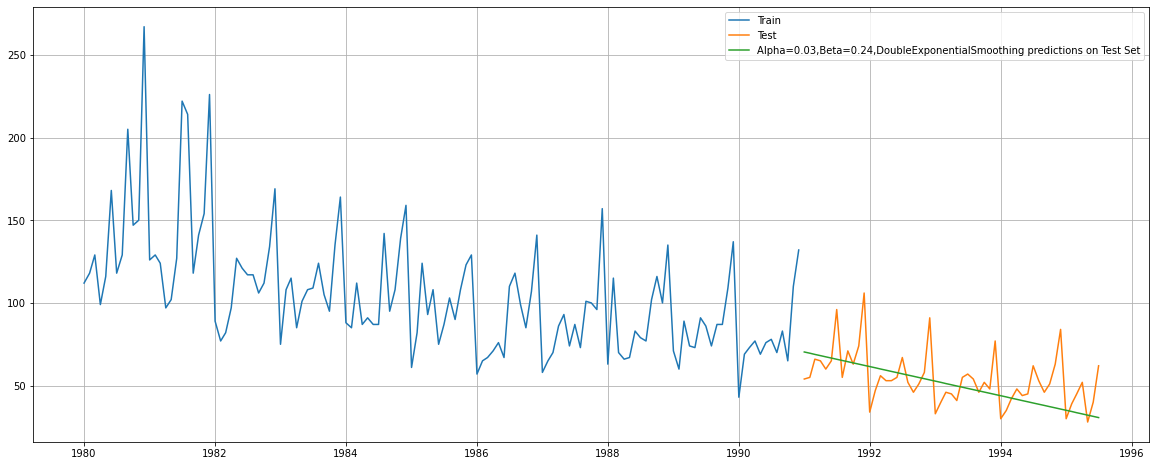

In [65]:
## Plotting on both the Training and Test data

plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.03, 0.24], label='Alpha=0.03,Beta=0.24,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [66]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.03,Beta=0.24,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,15.303047
NaiveModel,79.281547
SimpleAverageModel,53.029519
"Alpha=0.0987,SimpleExponentialSmoothing",36.381647
"Alpha=0.06,SimpleExponentialSmoothing",36.166299
"Alpha=0.03,Beta=0.24,DoubleExponentialSmoothing",16.049350


### Triple Exponential Smoothing

In [67]:
TES_train = train.copy()
TES_test = test.copy()

In [68]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='add',seasonal='multiplicative')

D:\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [69]:
model_TES_autofit = model_TES.fit()

In [70]:
model_TES_autofit.params

{'smoothing_level': 0.06569374607191865,
 'smoothing_trend': 0.05192938504457338,
 'smoothing_seasonal': 3.879136202038614e-06,
 'damping_trend': nan,
 'initial_level': 54.10985491750761,
 'initial_trend': -0.33471965714896845,
 'initial_seasons': array([2.08282313, 2.36326666, 2.58210206, 2.25702695, 2.53757493,
        2.76639991, 3.04101803, 3.23434567, 3.06747277, 3.00164124,
        3.49893806, 4.82552476]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [71]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
YearMonth,,
1991-01-01,54.0,56.689174
1991-02-01,55.0,64.129166
1991-03-01,66.0,69.856436
1991-04-01,65.0,60.877474
1991-05-01,60.0,68.237072


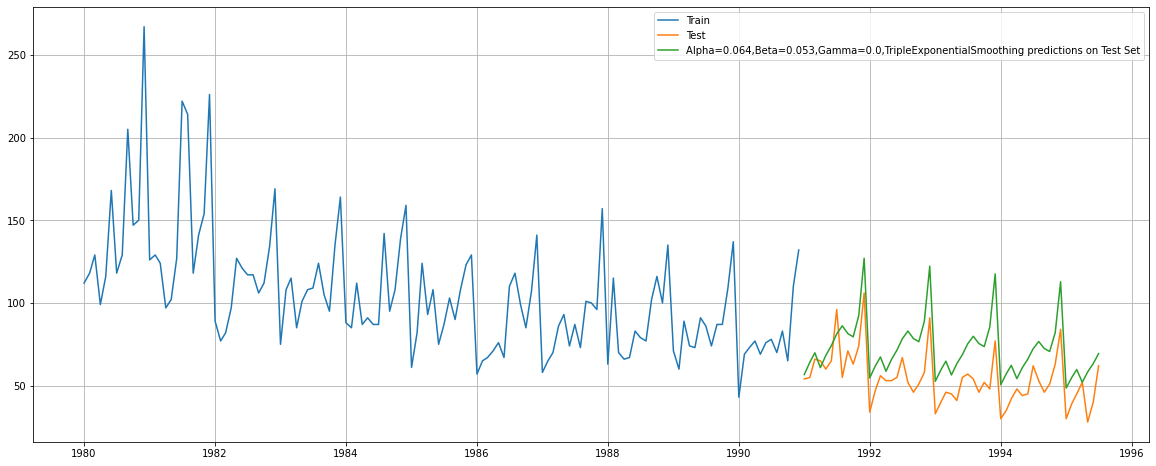

In [72]:
## Plotting on both the Training and Test using autofit

plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [73]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("Alpha=0.064,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Alpha=0.064,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 20.572


In [74]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,15.303047
NaiveModel,79.281547
SimpleAverageModel,53.029519
"Alpha=0.0987,SimpleExponentialSmoothing",36.381647
"Alpha=0.06,SimpleExponentialSmoothing",36.166299
"Alpha=0.03,Beta=0.24,DoubleExponentialSmoothing",16.049350
"Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing",20.572384


In [75]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [77]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [78]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.03,0.03,0.03,31.346407,12.691322
1,0.03,0.03,0.06,30.113481,11.733466
2,0.03,0.03,0.09,29.096803,11.414229
3,0.03,0.03,0.12,28.253398,11.543119
4,0.03,0.03,0.15,27.550294,11.950071
...,...,...,...,...,...
40847,1.00,1.00,0.60,28358.458519,9603.611291
40848,1.00,1.00,0.70,30724.126331,23029.954686
40849,1.00,1.00,0.80,1218.755446,9626.869903
40850,1.00,1.00,0.90,14150.253251,9691.917124


In [79]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
763,0.03,0.66,0.24,26.107392,8.725501
796,0.03,0.69,0.15,27.242225,8.832728
764,0.03,0.66,0.27,25.844066,8.862557
731,0.03,0.63,0.36,25.229701,8.921275
730,0.03,0.63,0.33,25.390453,8.978389


In [81]:
resultsDf_8_2.iloc[763]

Alpha Values     0.030000
Beta Values      0.660000
Gamma Values     0.240000
Train RMSE      26.107392
Test RMSE        8.725501
Name: 763, dtype: float64

In [82]:
TES_test['predict',0.03,0.66,0.24] = model_TES.fit(smoothing_level=0.03, smoothing_trend=0.66,smoothing_seasonal=0.24,optimized=False,use_brute=True).forecast(steps=55)

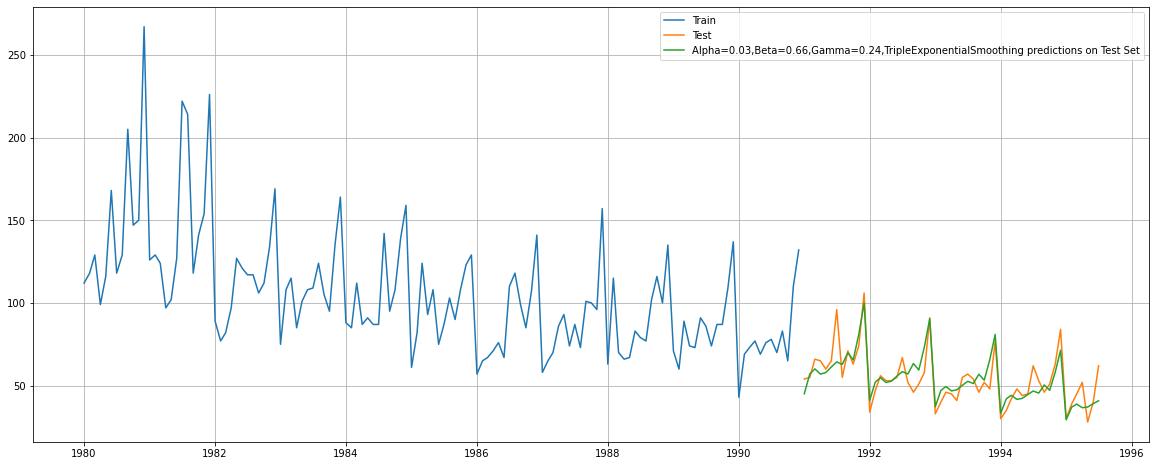

In [83]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict',0.03,0.66,0.24], label='Alpha=0.03,Beta=0.66,Gamma=0.24,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [84]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.03,Beta=0.66,Gamma=0.24,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE
RegressionOnTime,15.303047
NaiveModel,79.281547
SimpleAverageModel,53.029519
"Alpha=0.0987,SimpleExponentialSmoothing",36.381647
"Alpha=0.06,SimpleExponentialSmoothing",36.166299
"Alpha=0.03,Beta=0.24,DoubleExponentialSmoothing",16.049350
"Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing",20.572384
"Alpha=0.03,Beta=0.66,Gamma=0.24,TripleExponentialSmoothing",8.725501


## Stationarity of Time series

In [85]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput,'\n')

Results of Dickey-Fuller Test:
Test Statistic                  -1.887760
p-value                          0.337841
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



At 5% significance, we see that p-value > 0.05. Hence, the TS is not stationary.

In [87]:
print ('Results of Dickey-Fuller Test:')
dftest_1 = adfuller(df.diff().dropna(), autolag='AIC')
dfoutput_1 = pd.Series(dftest_1[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest_1[4].items():
    dfoutput_1['Critical Value (%s)'%key] = value
print (dfoutput_1,'\n')

Results of Dickey-Fuller Test:
Test Statistic                -8.028518e+00
p-value                        1.987167e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



We see that at $\alpha$ = 0.05 the differenced Time Series is indeed stationary.

In [88]:
stat_df = df.diff().dropna() 

In [89]:
stat_df.head()

,Rose
YearMonth,
1980-02-01,6.0
1980-03-01,11.0
1980-04-01,-30.0
1980-05-01,17.0
1980-06-01,52.0


## ARIMA & SARIMA Models

### Train Test Split of Stationary Data

In [90]:
ARIMA_train=df[df.index.year < 1991]
ARIMA_test=df[df.index.year >= 1991]

In [91]:
ARIMA_train.shape

(132, 1)

In [92]:
ARIMA_train.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [93]:
print ('Results of Dickey-Fuller Test:')
dftest_train = adfuller(ARIMA_train, autolag='AIC')
dfoutput_train = pd.Series(dftest_train[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest_train[4].items():
    dfoutput_train['Critical Value (%s)'%key] = value
print (dfoutput_train,'\n')

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



At 5% significance, we see that p-value > 0.05. Hence, the train TS is not stationary.

In [94]:
print ('Results of Dickey-Fuller Test:')
dftest_train = adfuller(ARIMA_train.diff().dropna(), autolag='AIC')
dfoutput_train = pd.Series(dftest_train[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest_train[4].items():
    dfoutput_train['Critical Value (%s)'%key] = value
print (dfoutput_train,'\n')

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



At 5% significance, we see that p-value < 0.05. Hence, the differenced train TS is stationary.

### ARIMA Model Building

In [95]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(1, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [96]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [97]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(ARIMA_train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 1, 1) - AIC:1277.775753553521
ARIMA(1, 1, 2) - AIC:1277.3592281129256
ARIMA(1, 1, 3) - AIC:1279.312639992571


D:\DataScience\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(1, 1, 4) - AIC:1281.8924572199094
ARIMA(2, 1, 1) - AIC:1279.0456894093354
ARIMA(2, 1, 2) - AIC:1279.2986939365205
ARIMA(2, 1, 3) - AIC:1281.1962260431185
ARIMA(2, 1, 4) - AIC:1282.4166216018216
ARIMA(3, 1, 1) - AIC:1279.6059618578536
ARIMA(3, 1, 2) - AIC:1280.96924676004
ARIMA(3, 1, 3) - AIC:1273.1940974617016
ARIMA(3, 1, 4) - AIC:1274.3349608502328
ARIMA(4, 1, 1) - AIC:1281.116324505268


D:\DataScience\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(4, 1, 2) - AIC:1283.752727942822


D:\DataScience\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(4, 1, 3) - AIC:1284.9526869790193
ARIMA(4, 1, 4) - AIC:1284.77215799839


D:\DataScience\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [98]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
10,"(3, 1, 3)",1273.194097
11,"(3, 1, 4)",1274.334961
1,"(1, 1, 2)",1277.359228
0,"(1, 1, 1)",1277.775754
4,"(2, 1, 1)",1279.045689
5,"(2, 1, 2)",1279.298694
2,"(1, 1, 3)",1279.312640
8,"(3, 1, 1)",1279.605962
9,"(3, 1, 2)",1280.969247
12,"(4, 1, 1)",1281.116325


In [99]:
auto_ARIMA = ARIMA(ARIMA_train['Rose'], order=(3,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

D:\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.356
Date:                Sun, 31 Jul 2022   AIC                           1273.194
Time:                        19:39:07   BIC                           1296.196
Sample:                    02-01-1980   HQIC                          1282.541
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.548      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7243      0.086     -8.411      0.000      -0.893      -0.556
ar.L2.D.Rose    -0.7218      0.087     -8.34

### ARIMA Prediction & Evaluation

In [100]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [101]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(ARIMA_test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

16.21728902664971


In [102]:
resultsDf_9= pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA (3,1,3)'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE
RegressionOnTime,15.303047
NaiveModel,79.281547
SimpleAverageModel,53.029519
"Alpha=0.0987,SimpleExponentialSmoothing",36.381647
"Alpha=0.06,SimpleExponentialSmoothing",36.166299
"Alpha=0.03,Beta=0.24,DoubleExponentialSmoothing",16.049350
"Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing",20.572384
"Alpha=0.03,Beta=0.66,Gamma=0.24,TripleExponentialSmoothing",8.725501
"ARIMA (3,1,3)",16.217289


### SARIMA Prediction & Evaluation

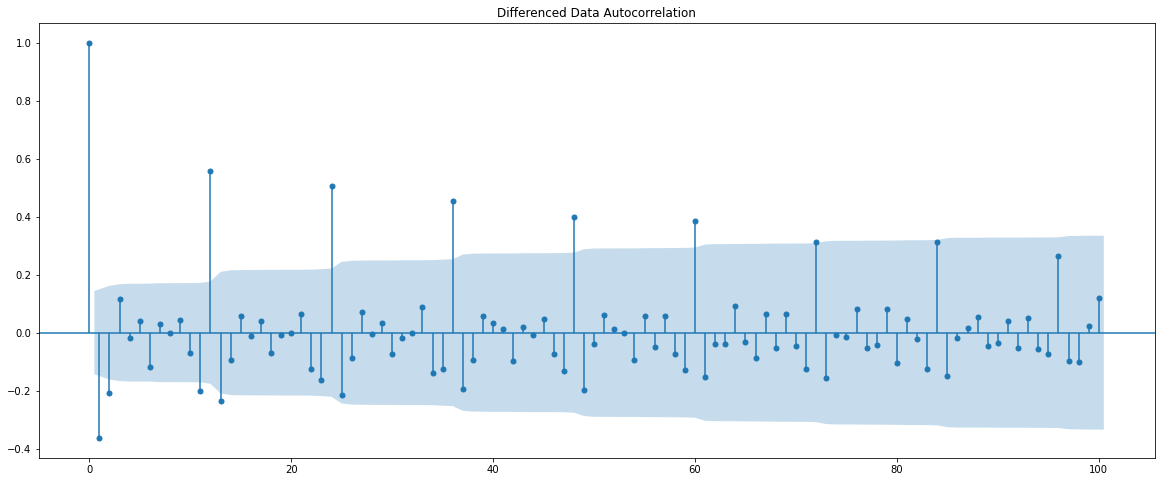

In [103]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Rose'].diff().dropna(),lags=100,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

In [105]:
import itertools
p = q = range(1, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (1, 1, 4)(1, 0, 4, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (2, 1, 4)(2, 0, 4, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)
Model: (3, 1, 4)(3, 0, 4, 6)
Model: (4, 1, 1)(4, 0, 1, 6)
Model: (4, 1, 2)(4, 0, 2, 6)
Model: (4, 1, 3)(4, 0, 3, 6)
Model: (4, 1, 4)(4, 0, 4, 6)


In [106]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [107]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(ARIMA_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:1162.424000437885
SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1083.258583438366
SARIMA(1, 1, 1)x(1, 0, 3, 6) - AIC:1003.9567058450393
SARIMA(1, 1, 1)x(1, 0, 4, 6) - AIC:930.7072546331484
SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1083.1711266749503
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1052.778469726568
SARIMA(1, 1, 1)x(2, 0, 3, 6) - AIC:963.6530363743724
SARIMA(1, 1, 1)x(2, 0, 4, 6) - AIC:919.9120203186953
SARIMA(1, 1, 1)x(3, 0, 1, 6) - AIC:1021.0487743440701
SARIMA(1, 1, 1)x(3, 0, 2, 6) - AIC:1006.9933719490738
SARIMA(1, 1, 1)x(3, 0, 3, 6) - AIC:966.2787323840555
SARIMA(1, 1, 1)x(3, 0, 4, 6) - AIC:919.8896840922232
SARIMA(1, 1, 1)x(4, 0, 1, 6) - AIC:910.7201847018678
SARIMA(1, 1, 1)x(4, 0, 2, 6) - AIC:911.942694760355
SARIMA(1, 1, 1)x(4, 0, 3, 6) - AIC:910.0772480230739
SARIMA(1, 1, 1)x(4, 0, 4, 6) - AIC:892.9367869981475
SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1155.4829112744003
SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1061.3428437952118
SARIMA(1, 1, 2)x(1, 0, 3, 6) - AIC:996.48

SARIMA(3, 1, 2)x(3, 0, 4, 6) - AIC:906.3566570305982
SARIMA(3, 1, 2)x(4, 0, 1, 6) - AIC:892.8985832195527
SARIMA(3, 1, 2)x(4, 0, 2, 6) - AIC:891.6219878033282
SARIMA(3, 1, 2)x(4, 0, 3, 6) - AIC:892.2550838352375
SARIMA(3, 1, 2)x(4, 0, 4, 6) - AIC:889.3456887798259
SARIMA(3, 1, 3)x(1, 0, 1, 6) - AIC:1126.6260872762282
SARIMA(3, 1, 3)x(1, 0, 2, 6) - AIC:1057.3117926742814
SARIMA(3, 1, 3)x(1, 0, 3, 6) - AIC:982.6950522259385
SARIMA(3, 1, 3)x(1, 0, 4, 6) - AIC:903.5899414151676
SARIMA(3, 1, 3)x(2, 0, 1, 6) - AIC:1054.3672228819914
SARIMA(3, 1, 3)x(2, 0, 2, 6) - AIC:1037.752443855646
SARIMA(3, 1, 3)x(2, 0, 3, 6) - AIC:952.5821050500738
SARIMA(3, 1, 3)x(2, 0, 4, 6) - AIC:891.0665409052409
SARIMA(3, 1, 3)x(3, 0, 1, 6) - AIC:966.4949686387279
SARIMA(3, 1, 3)x(3, 0, 2, 6) - AIC:967.752053959181
SARIMA(3, 1, 3)x(3, 0, 3, 6) - AIC:954.4665642804748
SARIMA(3, 1, 3)x(3, 0, 4, 6) - AIC:895.0667616965081
SARIMA(3, 1, 3)x(4, 0, 1, 6) - AIC:899.1777996520195
SARIMA(3, 1, 3)x(4, 0, 2, 6) - AIC:890.48757

In [108]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
127,"(2, 1, 4)","(4, 0, 4, 6)",870.449739
191,"(3, 1, 4)","(4, 0, 4, 6)",872.394848
255,"(4, 1, 4)","(4, 0, 4, 6)",874.074606
63,"(1, 1, 4)","(4, 0, 4, 6)",877.442691
115,"(2, 1, 4)","(1, 0, 4, 6)",877.710383


In [109]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(ARIMA_train['Rose'].values,
                                order=(2, 1, 4),
                                seasonal_order=(4, 0, 4, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 4)x(4, 0, 4, 6)   Log Likelihood                -420.225
Date:                           Sun, 31 Jul 2022   AIC                            870.450
Time:                                   19:51:24   BIC                            909.824
Sample:                                        0   HQIC                           886.394
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9320      0.044    -20.952      0.000      -1.019      -0.845
ar.L2         -0.9271      0.041    -22.357

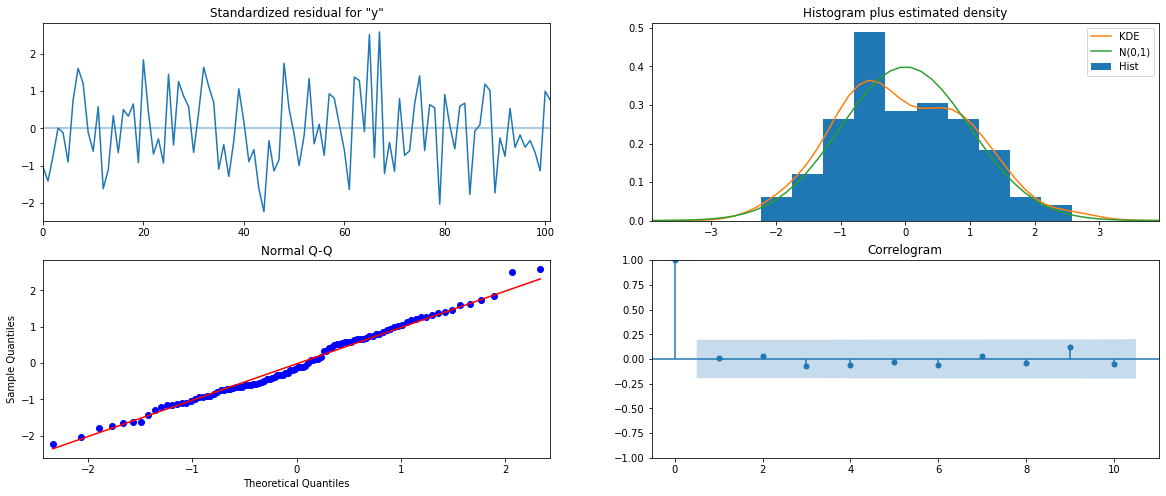

In [110]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [111]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [112]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.934965,13.878361,35.733877,90.136052
1,72.616207,14.088696,45.002870,100.229543
2,78.050283,14.143001,50.330511,105.770056
3,74.694938,14.144889,46.971464,102.418411
4,78.653652,14.150381,50.919415,106.387888


In [113]:
rmse = mean_squared_error(ARIMA_test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

28.032195055864886


In [ ]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(results_auto_SARIMA_6.get_forecast(steps=len(test), label='SARIMA @ (2,1,4) (4,0,4,6)')


plt.legend(loc='best')
plt.grid();

In [114]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(2, 1, 3)(3, 0, 3, 6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
RegressionOnTime,15.303047
NaiveModel,79.281547
SimpleAverageModel,53.029519
"Alpha=0.0987,SimpleExponentialSmoothing",36.381647
"Alpha=0.06,SimpleExponentialSmoothing",36.166299
"Alpha=0.03,Beta=0.24,DoubleExponentialSmoothing",16.049350
"Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing",20.572384
"Alpha=0.03,Beta=0.66,Gamma=0.24,TripleExponentialSmoothing",8.725501
"ARIMA (3,1,3)",16.217289
"SARIMA(2, 1, 3)(3, 0, 3, 6)",28.032195


In [121]:
import itertools
p = q = range(1, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (1, 1, 4)(1, 0, 4, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (2, 1, 4)(2, 0, 4, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)
Model: (3, 1, 4)(3, 0, 4, 12)
Model: (4, 1, 1)(4, 0, 1, 12)
Model: (4, 1, 2)(4, 0, 2, 12)
Model: (4, 1, 3)(4, 0, 3, 12)
Model: (4, 1, 4)(4, 0, 4, 12)


In [122]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [123]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(ARIMA_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547135129
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428503279
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3885.4831308765374
SARIMA(1, 1, 1)x(1, 0, 4, 12) - AIC:689.1226464571054
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470745
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.672579593691
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3815.529185431417
SARIMA(1, 1, 1)x(2, 0, 4, 12) - AIC:687.7079118929138
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447855586
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.811385029159
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3801.305225834893
SARIMA(1, 1, 1)x(3, 0, 4, 12) - AIC:688.1119008770246
SARIMA(1, 1, 1)x(4, 0, 1, 12) - AIC:694.68738503868
SARIMA(1, 1, 1)x(4, 0, 2, 12) - AIC:695.8952847038382


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(4, 0, 3, 12) - AIC:3260.1124057827983
SARIMA(1, 1, 1)x(4, 0, 4, 12) - AIC:689.3975105091586
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183220083724
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318500508657


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3771.2890404795453
SARIMA(1, 1, 2)x(1, 0, 4, 12) - AIC:683.5055405971614
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597827986624
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:889.902849369327


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3701.427574717762
SARIMA(1, 1, 2)x(2, 0, 4, 12) - AIC:682.7643408428883
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312805560863
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390249251345


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3688.8329148727094
SARIMA(1, 1, 2)x(3, 0, 4, 12) - AIC:682.5809859623025
SARIMA(1, 1, 2)x(4, 0, 1, 12) - AIC:696.5373667733193
SARIMA(1, 1, 2)x(4, 0, 2, 12) - AIC:697.8846004323602


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(4, 0, 3, 12) - AIC:3291.5323376480046
SARIMA(1, 1, 2)x(4, 0, 4, 12) - AIC:683.129667901442
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950927105722
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232291501883


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:2675.583928286201
SARIMA(1, 1, 3)x(1, 0, 4, 12) - AIC:677.5543035089037
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955658842624
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886590070266
SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3612.6634118577945
SARIMA(1, 1, 3)x(2, 0, 4, 12) - AIC:674.9582408293794
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310140930992
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467947378354


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2802.1057393772394
SARIMA(1, 1, 3)x(3, 0, 4, 12) - AIC:674.8272133682023
SARIMA(1, 1, 3)x(4, 0, 1, 12) - AIC:698.5369215451936
SARIMA(1, 1, 3)x(4, 0, 2, 12) - AIC:699.862937789714


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(4, 0, 3, 12) - AIC:3345.4669645128124
SARIMA(1, 1, 3)x(4, 0, 4, 12) - AIC:674.9927222807296
SARIMA(1, 1, 4)x(1, 0, 1, 12) - AIC:1029.5808414166286
SARIMA(1, 1, 4)x(1, 0, 2, 12) - AIC:893.7003087502007
SARIMA(1, 1, 4)x(1, 0, 3, 12) - AIC:3164.276236632548
SARIMA(1, 1, 4)x(1, 0, 4, 12) - AIC:671.8934405013387
SARIMA(1, 1, 4)x(2, 0, 1, 12) - AIC:911.9903776985675
SARIMA(1, 1, 4)x(2, 0, 2, 12) - AIC:877.5797218864077


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)x(2, 0, 3, 12) - AIC:3096.6630505612616
SARIMA(1, 1, 4)x(2, 0, 4, 12) - AIC:670.073199609732
SARIMA(1, 1, 4)x(3, 0, 1, 12) - AIC:795.8665287699263
SARIMA(1, 1, 4)x(3, 0, 2, 12) - AIC:795.3606140861154


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)x(3, 0, 3, 12) - AIC:3072.461440036165
SARIMA(1, 1, 4)x(3, 0, 4, 12) - AIC:668.9527796373507
SARIMA(1, 1, 4)x(4, 0, 1, 12) - AIC:699.8580606651931
SARIMA(1, 1, 4)x(4, 0, 2, 12) - AIC:701.1246348791011


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)x(4, 0, 3, 12) - AIC:3536.634646379056
SARIMA(1, 1, 4)x(4, 0, 4, 12) - AIC:670.9237135528992
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471204804
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822729
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3887.483130874628
SARIMA(2, 1, 1)x(1, 0, 4, 12) - AIC:691.1025137722474
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.639956536955
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866286772


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3023.3509150271693
SARIMA(2, 1, 1)x(2, 0, 4, 12) - AIC:689.683622632058
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639259064494
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598886524745


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3778.082117738038
SARIMA(2, 1, 1)x(3, 0, 4, 12) - AIC:690.0836159749147
SARIMA(2, 1, 1)x(4, 0, 1, 12) - AIC:690.0221237325583
SARIMA(2, 1, 1)x(4, 0, 2, 12) - AIC:690.378222759167


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(4, 0, 3, 12) - AIC:2962.45016385039
SARIMA(2, 1, 1)x(4, 0, 4, 12) - AIC:691.2746875122256
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909354771824
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488809099


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3544.171182936432
SARIMA(2, 1, 2)x(1, 0, 4, 12) - AIC:685.6563295153471
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781889114674
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687981961567


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3363.247345298559
SARIMA(2, 1, 2)x(2, 0, 4, 12) - AIC:684.7577567418638
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035240284
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640482420575


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3448.586951281936
SARIMA(2, 1, 2)x(3, 0, 4, 12) - AIC:684.5665880949417
SARIMA(2, 1, 2)x(4, 0, 1, 12) - AIC:691.6930190288767
SARIMA(2, 1, 2)x(4, 0, 2, 12) - AIC:692.3428698151176


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(4, 0, 3, 12) - AIC:2979.7393425983423
SARIMA(2, 1, 2)x(4, 0, 4, 12) - AIC:685.0062979062991
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.046196912473
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483346398198


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3791.940434772261
SARIMA(2, 1, 3)x(1, 0, 4, 12) - AIC:676.1054959776291
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.2328123179304
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191801415338


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3712.1478947283126
SARIMA(2, 1, 3)x(2, 0, 4, 12) - AIC:677.0295257763322
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101471700199
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452503916601


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3682.321753088024
SARIMA(2, 1, 3)x(3, 0, 4, 12) - AIC:676.9664210016556
SARIMA(2, 1, 3)x(4, 0, 1, 12) - AIC:689.4996580202701
SARIMA(2, 1, 3)x(4, 0, 2, 12) - AIC:690.3364321591615


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(4, 0, 3, 12) - AIC:2888.5863148687404
SARIMA(2, 1, 3)x(4, 0, 4, 12) - AIC:676.7005377298319
SARIMA(2, 1, 4)x(1, 0, 1, 12) - AIC:1021.2249790613156
SARIMA(2, 1, 4)x(1, 0, 2, 12) - AIC:880.5769434457129


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)x(1, 0, 3, 12) - AIC:3209.2920058069644
SARIMA(2, 1, 4)x(1, 0, 4, 12) - AIC:671.7638735754485
SARIMA(2, 1, 4)x(2, 0, 1, 12) - AIC:894.040566966556
SARIMA(2, 1, 4)x(2, 0, 2, 12) - AIC:872.7869318078864
SARIMA(2, 1, 4)x(2, 0, 3, 12) - AIC:3141.7312435477866
SARIMA(2, 1, 4)x(2, 0, 4, 12) - AIC:670.8272750614503
SARIMA(2, 1, 4)x(3, 0, 1, 12) - AIC:786.7794735038093
SARIMA(2, 1, 4)x(3, 0, 2, 12) - AIC:783.9445816543446


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)x(3, 0, 3, 12) - AIC:3132.3961143569786
SARIMA(2, 1, 4)x(3, 0, 4, 12) - AIC:670.8301671497456
SARIMA(2, 1, 4)x(4, 0, 1, 12) - AIC:691.1523710634551
SARIMA(2, 1, 4)x(4, 0, 2, 12) - AIC:692.0190126273959
SARIMA(2, 1, 4)x(4, 0, 3, 12) - AIC:3162.93564492086
SARIMA(2, 1, 4)x(4, 0, 4, 12) - AIC:667.6772629891789
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837553975168
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384298
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3889.4831308745534
SARIMA(3, 1, 1)x(1, 0, 4, 12) - AIC:692.3464074989897
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.327920853833
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523267522


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3515.384216943545
SARIMA(3, 1, 1)x(2, 0, 4, 12) - AIC:691.2109591302755
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300778068
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002852238873


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3915.3936297312184
SARIMA(3, 1, 1)x(3, 0, 4, 12) - AIC:691.5203615750405
SARIMA(3, 1, 1)x(4, 0, 1, 12) - AIC:683.7410087003673
SARIMA(3, 1, 1)x(4, 0, 2, 12) - AIC:685.0110947122789


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(4, 0, 3, 12) - AIC:3266.6219232541257
SARIMA(3, 1, 1)x(4, 0, 4, 12) - AIC:684.9996321667438
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260532411327
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875105233226


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:4032.940587702241
SARIMA(3, 1, 2)x(1, 0, 4, 12) - AIC:686.9257098960574
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441364618
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1431082346437


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:4711.656428387589
SARIMA(3, 1, 2)x(2, 0, 4, 12) - AIC:686.232667823626
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462137736811
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809344347368
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3912.7267296416185
SARIMA(3, 1, 2)x(3, 0, 4, 12) - AIC:686.01674356892
SARIMA(3, 1, 2)x(4, 0, 1, 12) - AIC:685.7388599780256
SARIMA(3, 1, 2)x(4, 0, 2, 12) - AIC:686.6692228830236
SARIMA(3, 1, 2)x(4, 0, 3, 12) - AIC:2975.5975490992923
SARIMA(3, 1, 2)x(4, 0, 4, 12) - AIC:686.0283961774294
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7662380406678
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.0483664933341


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3543.040328958739
SARIMA(3, 1, 3)x(1, 0, 4, 12) - AIC:678.1353947591649
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217100767557
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595714977788


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3695.3866332522175
SARIMA(3, 1, 3)x(2, 0, 4, 12) - AIC:679.029199597066
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690408935078
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316168676531
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3680.734077317536
SARIMA(3, 1, 3)x(3, 0, 4, 12) - AIC:678.9743820797966
SARIMA(3, 1, 3)x(4, 0, 1, 12) - AIC:685.0969304830521
SARIMA(3, 1, 3)x(4, 0, 2, 12) - AIC:684.6844271793145


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(4, 0, 3, 12) - AIC:3638.2373000335265
SARIMA(3, 1, 3)x(4, 0, 4, 12) - AIC:677.6561121371609
SARIMA(3, 1, 4)x(1, 0, 1, 12) - AIC:1021.0428026043037
SARIMA(3, 1, 4)x(1, 0, 2, 12) - AIC:882.1649475101103


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)x(1, 0, 3, 12) - AIC:4684.481504148987
SARIMA(3, 1, 4)x(1, 0, 4, 12) - AIC:674.4096427977695
SARIMA(3, 1, 4)x(2, 0, 1, 12) - AIC:895.2267461916125
SARIMA(3, 1, 4)x(2, 0, 2, 12) - AIC:872.6089679156289
SARIMA(3, 1, 4)x(2, 0, 3, 12) - AIC:26.0
SARIMA(3, 1, 4)x(2, 0, 4, 12) - AIC:670.3679376008291
SARIMA(3, 1, 4)x(3, 0, 1, 12) - AIC:782.0399329543462
SARIMA(3, 1, 4)x(3, 0, 2, 12) - AIC:780.1801172681622


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)x(3, 0, 3, 12) - AIC:109.53369278544069
SARIMA(3, 1, 4)x(3, 0, 4, 12) - AIC:670.4387606421404
SARIMA(3, 1, 4)x(4, 0, 1, 12) - AIC:685.1552217353355
SARIMA(3, 1, 4)x(4, 0, 2, 12) - AIC:687.5260165765288


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)x(4, 0, 3, 12) - AIC:3444.176002883082
SARIMA(3, 1, 4)x(4, 0, 4, 12) - AIC:667.3070262542343
SARIMA(4, 1, 1)x(1, 0, 1, 12) - AIC:1039.2388700564734
SARIMA(4, 1, 1)x(1, 0, 2, 12) - AIC:918.9597653943907


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(1, 0, 3, 12) - AIC:3240.7081699206656
SARIMA(4, 1, 1)x(1, 0, 4, 12) - AIC:693.3569832256921
SARIMA(4, 1, 1)x(2, 0, 1, 12) - AIC:881.9652791503048
SARIMA(4, 1, 1)x(2, 0, 2, 12) - AIC:883.8672137397338


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(2, 0, 3, 12) - AIC:3172.1928646909514
SARIMA(4, 1, 1)x(2, 0, 4, 12) - AIC:691.7949483099942
SARIMA(4, 1, 1)x(3, 0, 1, 12) - AIC:766.6969173778909
SARIMA(4, 1, 1)x(3, 0, 2, 12) - AIC:765.7476012635744


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(3, 0, 3, 12) - AIC:3088.6489293611853
SARIMA(4, 1, 1)x(3, 0, 4, 12) - AIC:690.8522116470875
SARIMA(4, 1, 1)x(4, 0, 1, 12) - AIC:676.8230706375987
SARIMA(4, 1, 1)x(4, 0, 2, 12) - AIC:677.9137527014173


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(4, 0, 3, 12) - AIC:2688.509022754041
SARIMA(4, 1, 1)x(4, 0, 4, 12) - AIC:679.6969257010329
SARIMA(4, 1, 2)x(1, 0, 1, 12) - AIC:1039.5950363819288
SARIMA(4, 1, 2)x(1, 0, 2, 12) - AIC:911.2623961863873


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)x(1, 0, 3, 12) - AIC:1918.6969114694161
SARIMA(4, 1, 2)x(1, 0, 4, 12) - AIC:686.4158916626824
SARIMA(4, 1, 2)x(2, 0, 1, 12) - AIC:881.8622733776989
SARIMA(4, 1, 2)x(2, 0, 2, 12) - AIC:883.6752356960978
SARIMA(4, 1, 2)x(2, 0, 3, 12) - AIC:1971.008647531738
SARIMA(4, 1, 2)x(2, 0, 4, 12) - AIC:685.6741107421385
SARIMA(4, 1, 2)x(3, 0, 1, 12) - AIC:767.1654132073871
SARIMA(4, 1, 2)x(3, 0, 2, 12) - AIC:766.1613991578843
SARIMA(4, 1, 2)x(3, 0, 3, 12) - AIC:1825.9095417704839
SARIMA(4, 1, 2)x(3, 0, 4, 12) - AIC:684.5876587711489
SARIMA(4, 1, 2)x(4, 0, 1, 12) - AIC:677.6413974755685
SARIMA(4, 1, 2)x(4, 0, 2, 12) - AIC:685.9829675646182


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)x(4, 0, 3, 12) - AIC:891.5065025090835
SARIMA(4, 1, 2)x(4, 0, 4, 12) - AIC:677.3201245170587
SARIMA(4, 1, 3)x(1, 0, 1, 12) - AIC:1016.9607081235567
SARIMA(4, 1, 3)x(1, 0, 2, 12) - AIC:900.6899432405247


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(1, 0, 3, 12) - AIC:3723.255039834763
SARIMA(4, 1, 3)x(1, 0, 4, 12) - AIC:679.9249048028682
SARIMA(4, 1, 3)x(2, 0, 1, 12) - AIC:880.9595122488669
SARIMA(4, 1, 3)x(2, 0, 2, 12) - AIC:882.1409669800455


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(2, 0, 3, 12) - AIC:3653.4420090590215
SARIMA(4, 1, 3)x(2, 0, 4, 12) - AIC:680.1585757791632
SARIMA(4, 1, 3)x(3, 0, 1, 12) - AIC:775.0755074578638
SARIMA(4, 1, 3)x(3, 0, 2, 12) - AIC:772.9863220077295


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(3, 0, 3, 12) - AIC:3641.742156504167
SARIMA(4, 1, 3)x(3, 0, 4, 12) - AIC:681.6491990600518
SARIMA(4, 1, 3)x(4, 0, 1, 12) - AIC:677.6281366773579
SARIMA(4, 1, 3)x(4, 0, 2, 12) - AIC:679.6142673046209


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(4, 0, 3, 12) - AIC:3155.6182957610454
SARIMA(4, 1, 3)x(4, 0, 4, 12) - AIC:684.0994017163417
SARIMA(4, 1, 4)x(1, 0, 1, 12) - AIC:1020.6942985812158
SARIMA(4, 1, 4)x(1, 0, 2, 12) - AIC:883.4529747853726


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)x(1, 0, 3, 12) - AIC:3771.0105394549346
SARIMA(4, 1, 4)x(1, 0, 4, 12) - AIC:677.5799616279153
SARIMA(4, 1, 4)x(2, 0, 1, 12) - AIC:880.2758794137942
SARIMA(4, 1, 4)x(2, 0, 2, 12) - AIC:883.5569323544194


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)x(2, 0, 3, 12) - AIC:3657.4191505146946
SARIMA(4, 1, 4)x(2, 0, 4, 12) - AIC:672.9657850394891
SARIMA(4, 1, 4)x(3, 0, 1, 12) - AIC:768.4535733675356
SARIMA(4, 1, 4)x(3, 0, 2, 12) - AIC:769.9161033547837
SARIMA(4, 1, 4)x(3, 0, 3, 12) - AIC:3673.298659338398
SARIMA(4, 1, 4)x(3, 0, 4, 12) - AIC:672.4880844711925
SARIMA(4, 1, 4)x(4, 0, 1, 12) - AIC:677.2262848618424
SARIMA(4, 1, 4)x(4, 0, 2, 12) - AIC:672.6412387223124


D:\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)x(4, 0, 3, 12) - AIC:2910.749017402019
SARIMA(4, 1, 4)x(4, 0, 4, 12) - AIC:669.285956921125


In [124]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
182,"(3, 1, 4)","(2, 0, 3, 12)",26.000000
186,"(3, 1, 4)","(3, 0, 3, 12)",109.533693
191,"(3, 1, 4)","(4, 0, 4, 12)",667.307026
127,"(2, 1, 4)","(4, 0, 4, 12)",667.677263
59,"(1, 1, 4)","(3, 0, 4, 12)",668.952780


In [125]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(ARIMA_train['Rose'].values,
                                order=(3,1,4),
                                seasonal_order=(2,0,3,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  132
Model:             SARIMAX(3, 1, 4)x(2, 0, [1, 2, 3], 12)   Log Likelihood                   0.000
Date:                                    Sun, 31 Jul 2022   AIC                             26.000
Time:                                            20:38:32   BIC                             58.498
Sample:                                                 0   HQIC                            39.105
                                                    - 132                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1        -11.3133   1279.917     -0.009      0

LinAlgError: singular matrix

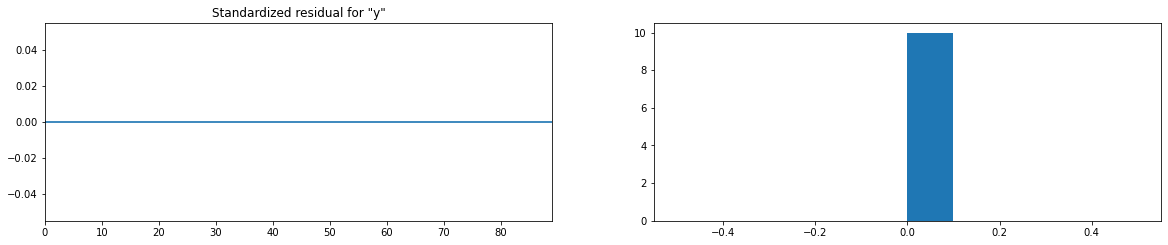

In [126]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [127]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [128]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,-1.089847e+108,NaN,NaN,NaN
1,1.220382e+109,NaN,NaN,NaN
2,-1.366551e+110,NaN,NaN,NaN
3,1.530228e+111,NaN,NaN,NaN
4,-1.713509e+112,NaN,NaN,NaN


In [129]:
rmse = mean_squared_error(ARIMA_test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

inf


In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA (3,1,1)(1,0,3,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

resultsDf.sort_values(by='Test RMSE')

## ARIMA & SARIMA Models using  ACF & PACF plots 

### MANUAL ARIMA

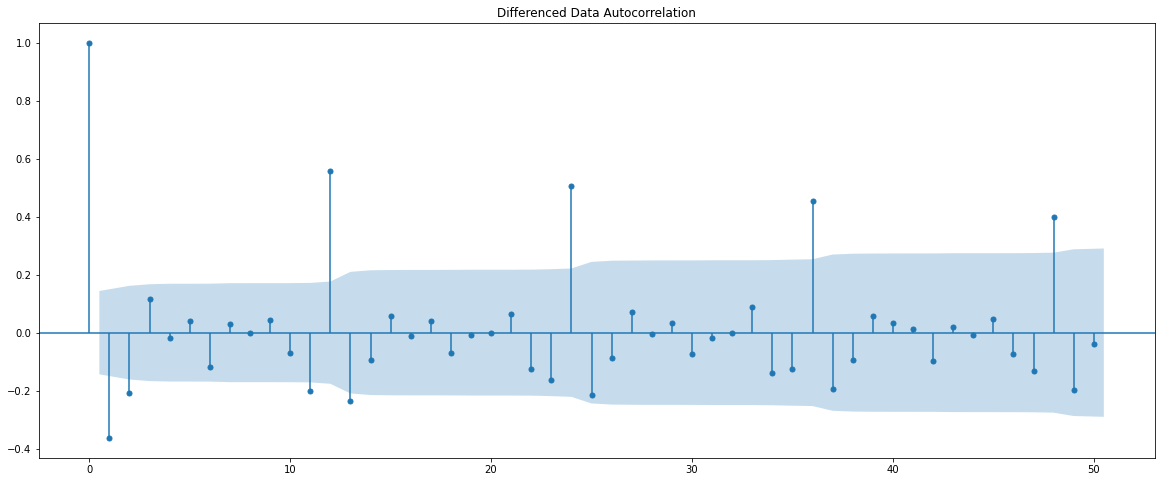

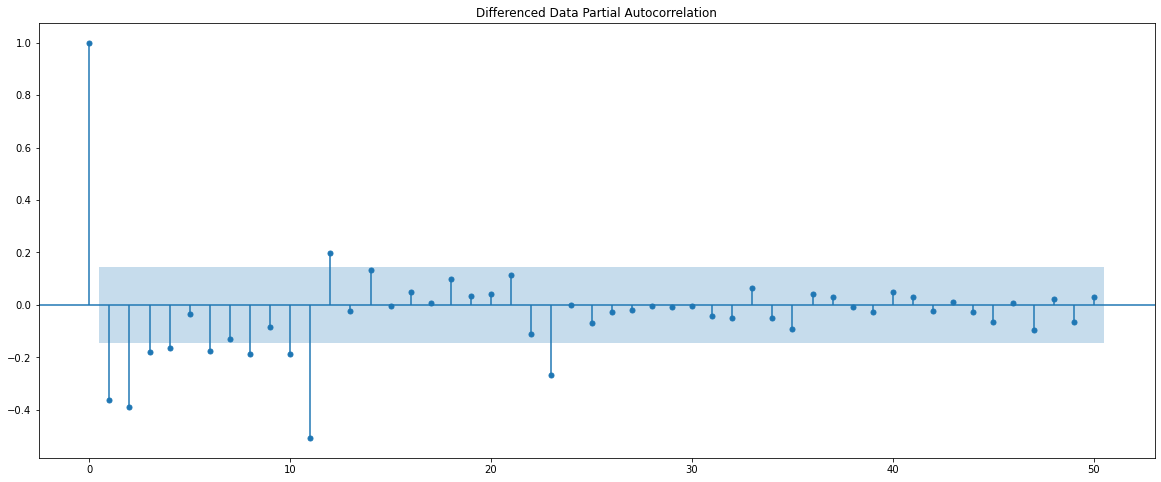

In [130]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation',method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

<b> By looking at the above plots, we can say that the PACF plot cuts-off at lag 4 and ACF plot cuts-off at lag 2.
    
    p = 4
    q = 2

In [131]:
manual_ARIMA = ARIMA(ARIMA_train['Rose'], order=(4,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

D:\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -633.876
Method:                       css-mle   S.D. of innovations             29.793
Date:                Sun, 31 Jul 2022   AIC                           1283.753
Time:                        20:41:18   BIC                           1306.754
Sample:                    02-01-1980   HQIC                          1293.099
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1905      0.576     -0.331      0.741      -1.319       0.938
ar.L1.D.Rose     1.1685      0.087     13.391      0.000       0.997       1.340
ar.L2.D.Rose    -0.3562      0.132     -2.69

D:\DataScience\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [132]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [133]:
rmse = mean_squared_error(ARIMA_test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

33.56607021232377


In [134]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual ARIMA(4,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
RegressionOnTime,15.303047
NaiveModel,79.281547
SimpleAverageModel,53.029519
"Alpha=0.0987,SimpleExponentialSmoothing",36.381647
"Alpha=0.06,SimpleExponentialSmoothing",36.166299
"Alpha=0.03,Beta=0.24,DoubleExponentialSmoothing",16.049350
"Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing",20.572384
"Alpha=0.03,Beta=0.66,Gamma=0.24,TripleExponentialSmoothing",8.725501
"ARIMA (3,1,3)",16.217289
"SARIMA(2, 1, 3)(3, 0, 3, 6)",28.032195


### Manual SARIMA - Seasonality @ 6

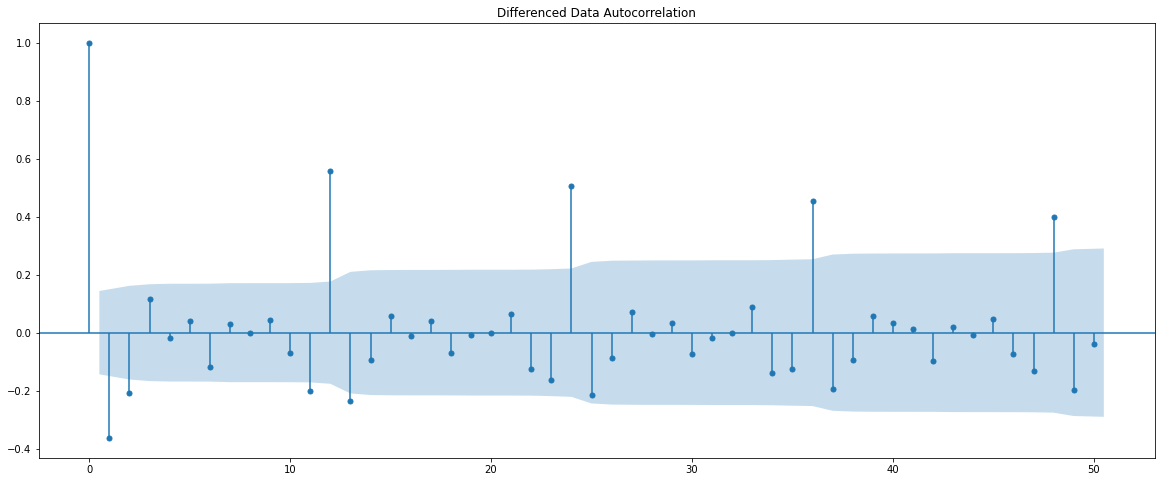

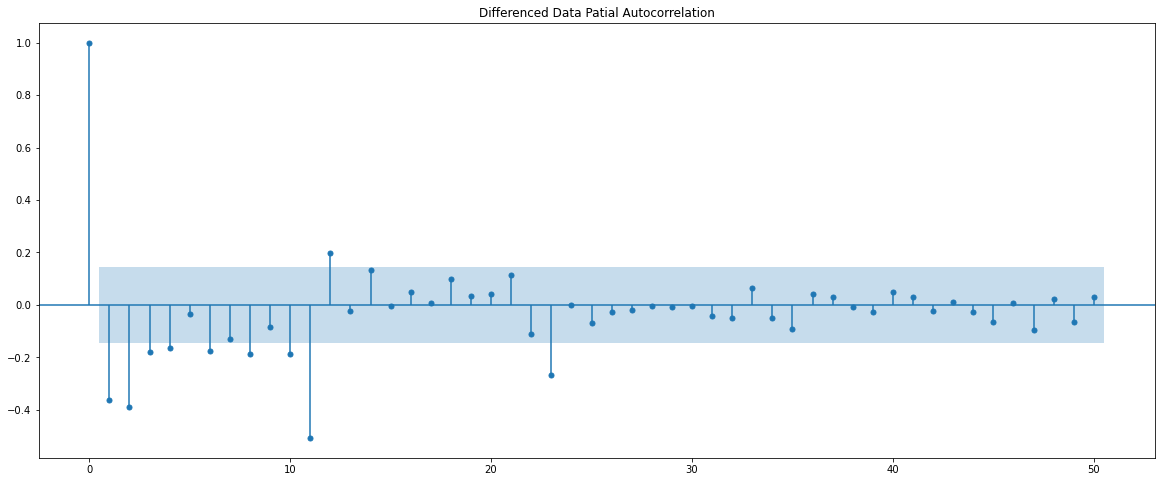

In [135]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation',method='ywmle')
plt.show()

Here from ACF plot we can see that there is a seasonal pattern at every 12th lag. THere plot is cut off at every 12th lag.
Hence, Q = 12.

Here from PACF plot we can see that there is no specific seasonal pattern at every 12th lag or any other lag. 
Hence, P = 0.

D=0, as the stationarity has been established after differencing in the ARIMA model

In [136]:

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(ARIMA_train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(0, 0, 12, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                                        SARIMAX Results                                                        
Dep. Variable:                                                                       y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 0, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 6)   Log Likelihood                -234.220
Date:                                                                 Sun, 31 Jul 2022   AIC                            506.440
Time:                                                                         20:45:08   BIC                            544.922
Sample:                                                                              0   HQIC                           521.360
                                                                                 - 132                                         
Covariance Type:                                                                   opg                  

In [137]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [138]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,58.103257,12.578500,33.449851,82.756664
1,57.630771,12.480087,33.170249,82.091293
2,62.395058,12.550137,37.797242,86.992873
3,69.183718,12.720177,44.252629,94.114806
4,70.797466,12.973909,45.369071,96.225861


In [139]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

17.2058507882713


In [140]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual SARIMA(4,1,2) (0,0,12,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
RegressionOnTime,15.303047
NaiveModel,79.281547
SimpleAverageModel,53.029519
"Alpha=0.0987,SimpleExponentialSmoothing",36.381647
"Alpha=0.06,SimpleExponentialSmoothing",36.166299
"Alpha=0.03,Beta=0.24,DoubleExponentialSmoothing",16.049350
"Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing",20.572384
"Alpha=0.03,Beta=0.66,Gamma=0.24,TripleExponentialSmoothing",8.725501
"ARIMA (3,1,3)",16.217289
"SARIMA(2, 1, 3)(3, 0, 3, 6)",28.032195


## Combine Test RMSEs

In [141]:
resultsDf.sort_values(by='Test RMSE', ascending=True)

,Test RMSE
"Alpha=0.03,Beta=0.66,Gamma=0.24,TripleExponentialSmoothing",8.725501
RegressionOnTime,15.303047
"Alpha=0.03,Beta=0.24,DoubleExponentialSmoothing",16.049350
"ARIMA (3,1,3)",16.217289
"Manual SARIMA(4,1,2) (0,0,12,6)",17.205851
"Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing",20.572384
"SARIMA(2, 1, 3)(3, 0, 3, 6)",28.032195
"Manual ARIMA(4,1,2)",33.566070
"Alpha=0.06,SimpleExponentialSmoothing",36.166299
"Alpha=0.0987,SimpleExponentialSmoothing",36.381647


## Full Data - Optimum Model

In [142]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.03,
                                                                 smoothing_trend=0.66,
                                                                 smoothing_seasonal=0.24)

D:\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [143]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 18.6864998226889


In [144]:
# Getting the predictions for the next 12 months
prediction_1 = fullmodel1.forecast(steps=12)

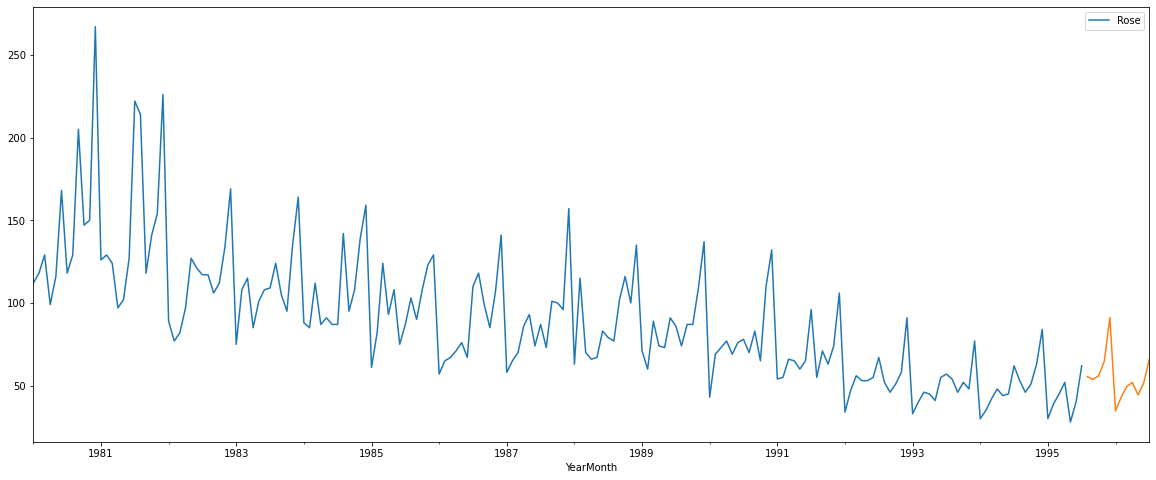

In [145]:
df.plot()
prediction_1.plot();

In [146]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,18.788034,55.466898,92.145762
1995-09-01,17.019155,53.698019,90.376882
1995-10-01,19.269351,55.948215,92.627079
1995-11-01,27.934419,64.613283,101.292147
1995-12-01,54.488038,91.166902,127.845766


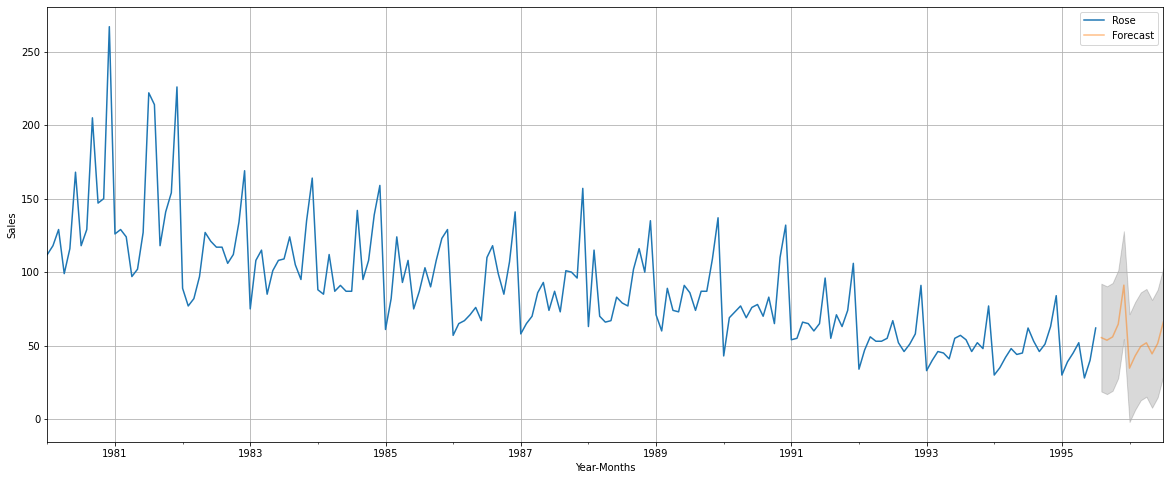

In [147]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual')
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()